In [1]:
!pip install qiskit qiskit_aer numpy matplotlib qiskit-ibm-runtime

# Qiskit Examples

In [2]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [3]:
display(u.draw("latex"))
display(v.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
display(u.is_valid())
display(w.is_valid())

True

False

In [5]:
# Simulate Measurement
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

In [6]:
v.measure()

(np.str_('0'),
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{np.str_('0'): np.int64(557), np.str_('1'): np.int64(443)}

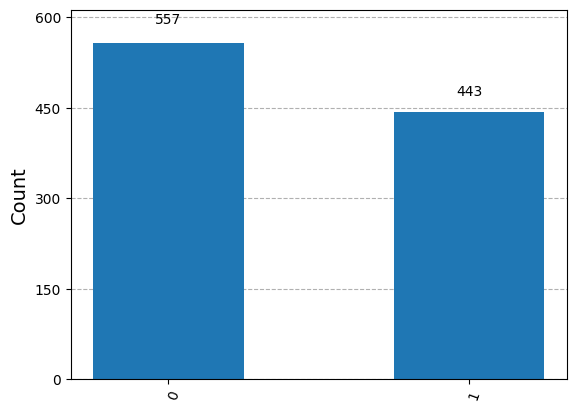

In [7]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [8]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

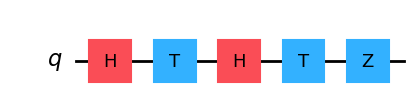

In [9]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw(output='mpl')

In [10]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

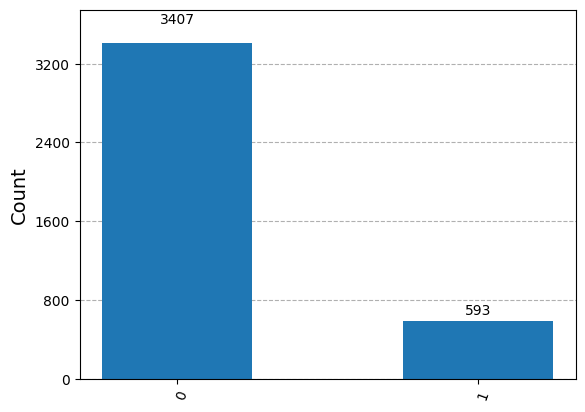

In [11]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

# Qubit

In [20]:
# Built-in modules

from qiskit.circuit.library import MCXGate
from qiskit import QuantumCircuit, assemble, QuantumRegister, ClassicalRegister,transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector,plot_state_city,plot_distribution
from qiskit_aer import AerSimulator
from numpy.random import randint
import numpy as np

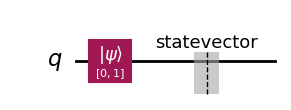

In [21]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qc.draw(output='mpl') 

In [22]:
simulator = AerSimulator()
qtranspiled = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qtranspiled).result()

out_state = result.get_statevector()
out_state.draw("latex")
#print(out_state) # Display the output state vector

<IPython.core.display.Latex object>

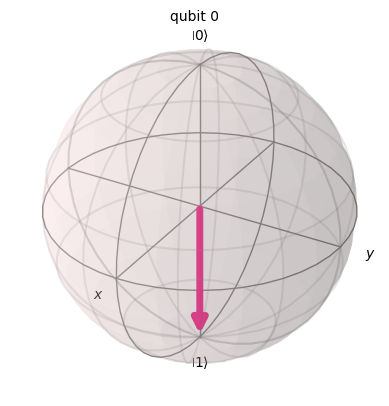

In [23]:
plot_bloch_multivector(out_state)

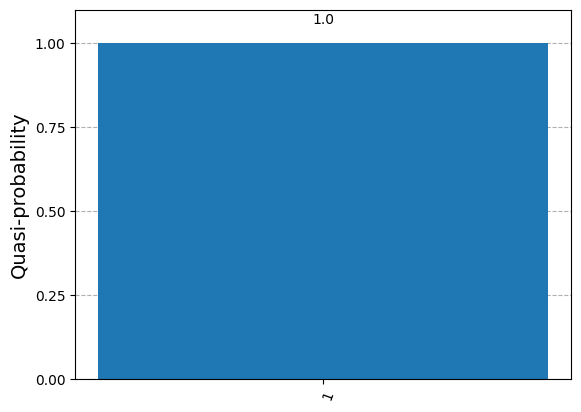

In [25]:
counts = result.get_counts()
plot_histogram(counts)

## Bell State

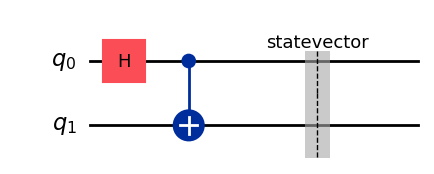

In [55]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.h(0)
qc.cx(0,1)
# See the circuit:
qc.save_statevector()   # Tell simulator to save statevector
qc.draw(output="mpl")

In [56]:
simulator = AerSimulator()
qtranspiled = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qtranspiled).result()

out_state = result.get_statevector()
out_state.draw("latex")
#print(out_state) # Display the output state vector

<IPython.core.display.Latex object>

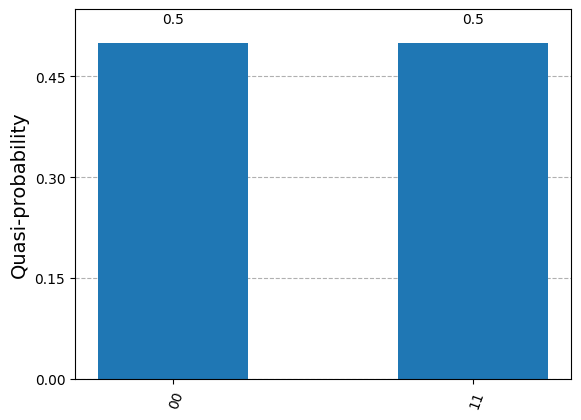

In [58]:
counts = result.get_counts()
plot_histogram(counts)

# Quantum Register

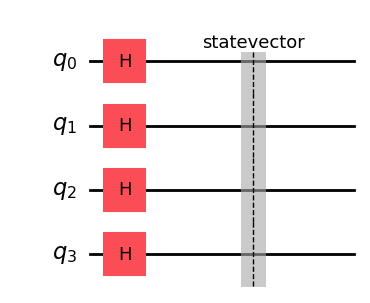

In [59]:
n = 4
qc = QuantumCircuit(n)  # Create a quantum circuit with one qubit
#initial_state = [1/sqrt(2**n),1/sqrt(2**n), 1/sqrt(2**n), 1/sqrt(2**n)]
#qc.initialize(initial_state,qc.qubits) # Apply initialisation operation to the 0th qubit
for i in range(0, n):
    qc.h(i) 
qc.save_statevector()   # Tell simulator to save statevector
qc.draw(output='mpl') 


In [60]:
simulator = AerSimulator()
qtranspiled = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qtranspiled).result()

out_state = result.get_statevector()
out_state.draw("latex")
#print(out_state) # Display the output state vector

<IPython.core.display.Latex object>

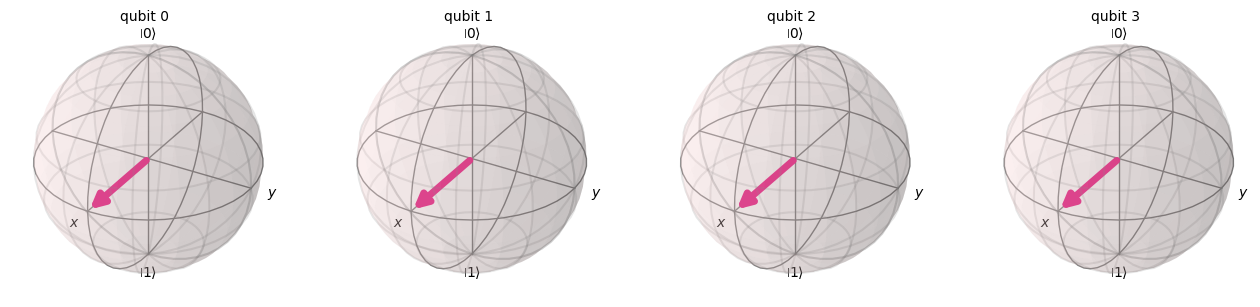

In [29]:
plot_bloch_multivector(out_state)

# Quantum Gates

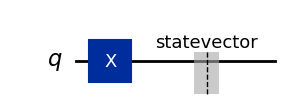

In [35]:
qc = QuantumCircuit(1)
qc.x(0)
qc.save_statevector()
qc.draw(output = 'mpl')


In [36]:
simulator = AerSimulator()
qtranspiled = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qtranspiled).result()

out_state = result.get_statevector()
out_state.draw("latex")

<IPython.core.display.Latex object>

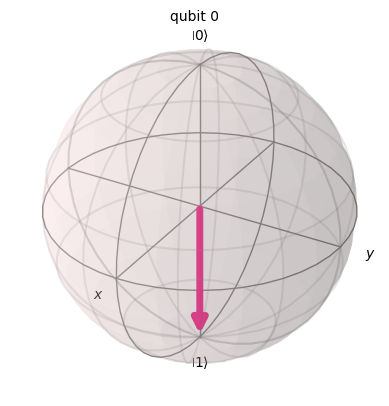

In [37]:
plot_bloch_multivector(out_state)

## Y, Z, and H

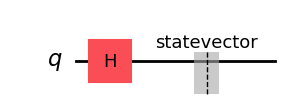

In [45]:
qc = QuantumCircuit(1)
qc.h(0)
qc.save_statevector()
qc.draw(output = 'mpl')


In [46]:
simulator = AerSimulator()
qtranspiled = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qtranspiled).result()

out_state = result.get_statevector()
out_state.draw("latex")

<IPython.core.display.Latex object>

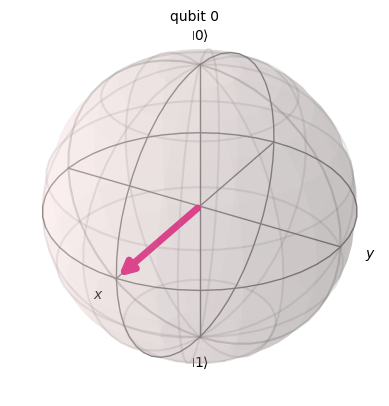

In [47]:
plot_bloch_multivector(out_state)

# Simple Adder

In [72]:
def get_adder_instruction():
    def majority(circ,a,b,c):
        circ.cx(c,b)
        circ.cx(c,a)
        circ.ccx(a, b, c)
    def unmaj(circ,a,b,c):
        circ.ccx(a, b, c)
        circ.cx(c, a)
        circ.cx(a, b)
    def adder_4_qubits(p, a0, a1, a2, a3, b0, b1, b2, b3, cin, cout):
        majority(p, cin, b0, a0)
        majority(p, a0, b1, a1)
        majority(p, a1, b2, a2)
        majority(p, a2, b3, a3)
        p.cx(a3, cout)
        unmaj(p, a2, b3, a3)
        unmaj(p, a1, b2, a2)
        unmaj(p, a0, b1, a1)
        unmaj(p, cin, b0, a0)
    a = QuantumRegister(4, "aop")
    b = QuantumRegister(4, "bop")
    c = QuantumRegister(2, "carry")

    add_circ = QuantumCircuit(a, b, c,name="Add")
    adder_4_qubits(add_circ, a[0], a[1], a[2], a[3], b[0], b[1], b[2], b[3], c[0], c[1])
    add_instr = add_circ.to_instruction()
    add_circ.draw()
    return add_instr

In [73]:
n_bits = 4
a_reg = QuantumRegister(n_bits,"aqreg")
b_reg = QuantumRegister(n_bits,"bqreg")
carry= QuantumRegister(2,"carry")
cc = ClassicalRegister(n_bits,"cc")
qc = QuantumCircuit(a_reg,b_reg,carry,cc)

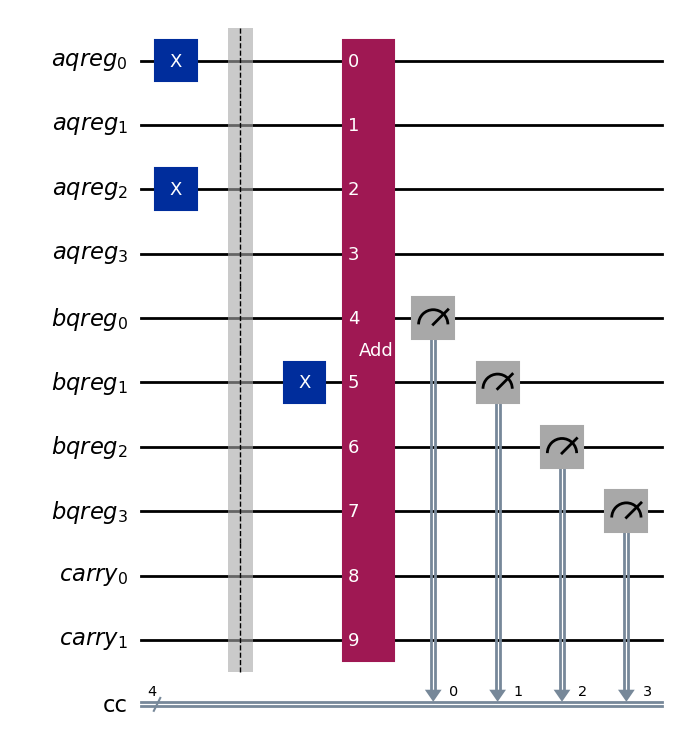

In [74]:
qc.x(a_reg[0])
qc.x(a_reg[2])
qc.barrier()

qc.x(b_reg[1])

adder_instr = get_adder_instruction()
qc.append(adder_instr,[q for q in range(0,10)])
qc.measure(b_reg,cc)
qc.draw(output="mpl")

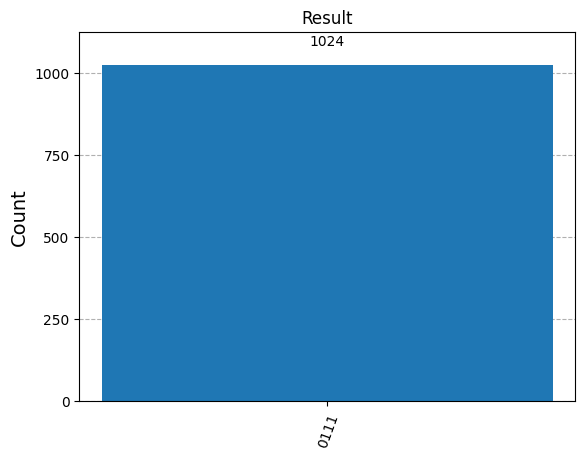

In [75]:
simulator = AerSimulator()
qcirc = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qcirc).result()

counts = result.get_counts(qcirc)
plot_histogram(counts, title='Result')